# Atividade Titanic

## Fiz só para visualização de output


---------------------------------------------

Cabeçalho do dataset de treino

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  

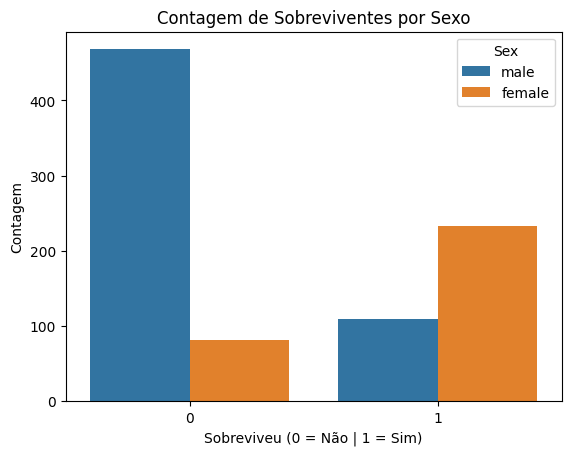

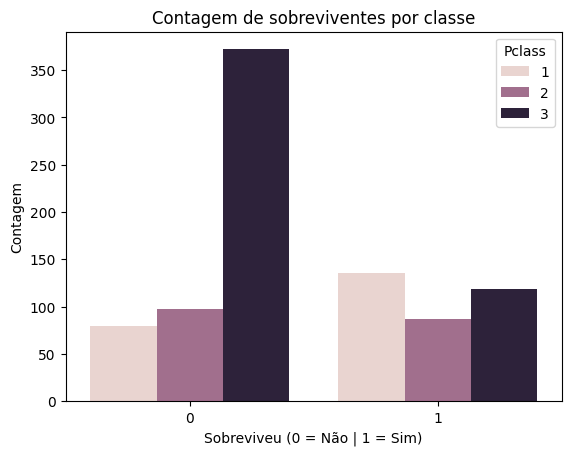


---------------------------------------------

avaliação do modelo: 

acurácia no conjunto de validação: 0.82

relatório de classificação:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


matriz de confusão:
 [[92 13]
 [20 54]]

---------------------------------------------



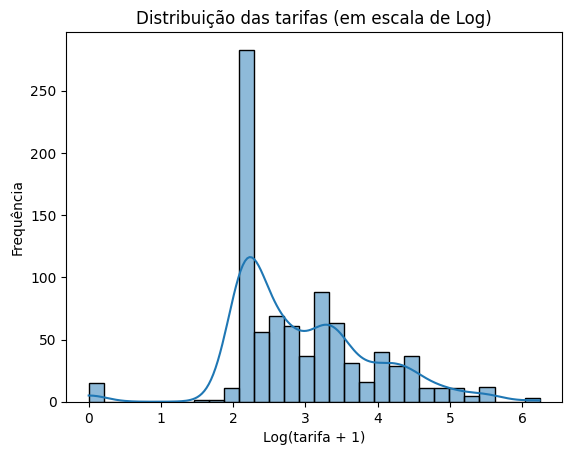

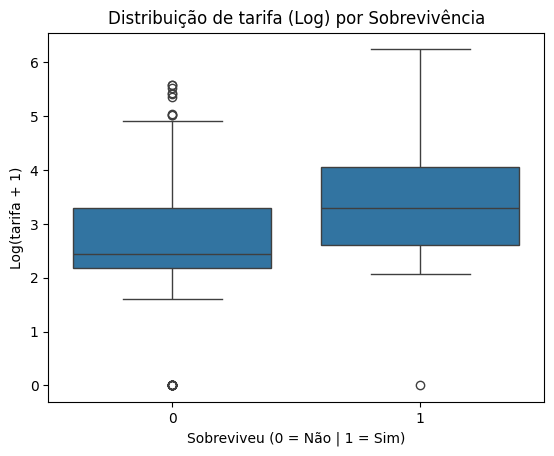


---------------------------------------------

A análise dos gráficos mostra que passageiros que pagaram tarifas mais altas, tiveram taxas de sobrevivencia maiores, porém, como há uma concentração no preço médio, acaba que isso é um viés

---------------------------------------------


---------------------------------------------

Conclusão


---------------------------------------------

Modelo de Sobrevivência (Classificação):
O modelo RandomForest teve acurácia de 0.82, o que é um bom para este problema/cenário. A análise exploratória inicial já indicava que o sexo e a classe do passageiro eram fortes preditores de sobrevivência, o que o modelo conseguiu capturar bem. (Não sei se na realidade foi assim, mas no filme as mulheres foram embarcadas nos botes de sobrevivencia primeiro, oque pode ajudou na maior taxa de sobrevivencia.

Análise da tarifa
A análise secundária da tarifa mostrou uma clara correlação entre o valor pago e a chance de sobrevivência. Mas, como a maioria dos dad

<Figure size 640x480 with 0 Axes>

In [1]:
"""
Nome: Victor Augusto de Aquino Silvério

Atividade Titanic

fiz a analise com 2 objetivos:

1. Prever a sobrevivência dos passageiros
2. Analisar a influência da tarifa na sobrevivência

"""

# Bibliotecas:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# carregando os datasets
path_treino = r'C:\Users\victo\Python_Senai390\Semana_5\atividade_titanic\data\train.csv'
path_teste = r'C:\Users\victo\Python_Senai390\Semana_5\atividade_titanic\data\test.csv'

df_treino = pd.read_csv(path_treino)
df_teste = pd.read_csv(path_teste)

print("\n" + "---"*15 + "\n")
print("Cabeçalho do dataset de treino\n")
print(df_treino.head())
print("\n" + "---"*15 + "\n")

print("verificação de NaN\n")
print("Valores nulos no dataset de treino:")
print(df_treino.isnull().sum())
print("---"*15)
print("Valores nulos no dataset de teste:")
print(df_teste.isnull().sum())
print("\n" + "---"*15 + "\n")

# Tratamento de dados nulos

# Para a idade, preenchi com a mediana, para ser menos sensivel a outliers
mediana_idade = df_treino['Age'].median()
df_treino['Age'] = df_treino['Age'].fillna(mediana_idade)
df_teste['Age'] = df_teste['Age'].fillna(mediana_idade)

# Para o status de embarcado, como são só 2, coloquei a moda.
moda_embarque = df_treino['Embarked'].mode()[0]
df_treino['Embarked'] = df_treino['Embarked'].fillna(moda_embarque)

# Para a tarifa, coloquei a mediana
mediana_tarifa = df_teste['Fare'].median()
df_teste['Fare'] = df_teste['Fare'].fillna(mediana_tarifa)

# A variavel do nº da cabine tem muitos nulos ( mais de 1000 no total), então para ser mais efetivo, vou criar uma nova coluna para separar os que tiveram cabine identificada e os que não tiveram. 
df_treino['TemCabine'] = df_treino['Cabin'].notna().astype(int)
df_teste['TemCabine'] = df_teste['Cabin'].notna().astype(int)

# Remoção de dados inúteis ou já tratatados:
df_treino_2 = df_treino.copy() # DataFrame original para analises em colunas retirei agora
df_treino = df_treino.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)
df_teste = df_teste.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

print("\n" + "---"*15 + "\n")
print("conferencia de tratamento: \n")
print("Valores nulos restantes no treino:")
print(df_treino.isnull().sum().sum())
print("Valores nulos restantes no teste:")
print(df_teste.isnull().sum().sum())
print("\n" + "---"*15 + "\n")

# conversão de variaveis
df_treino = pd.get_dummies(df_treino, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df_teste = pd.get_dummies(df_teste, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

# gráfico de sobreviventes por sexo
sns.countplot(x='Survived', hue='Sex', data=df_treino_2)
plt.title('Contagem de Sobreviventes por Sexo')
plt.xlabel('Sobreviveu (0 = Não | 1 = Sim)')
plt.ylabel('Contagem')
plt.show()
plt.clf()

# grafico de sobreviventes por classe
sns.countplot(x='Survived', hue='Pclass', data=df_treino_2)
plt.title('Contagem de sobreviventes por classe')
plt.xlabel('Sobreviveu (0 = Não | 1 = Sim)')
plt.ylabel('Contagem')
plt.show()
plt.clf()

# preparando modelo
X = df_treino.drop('Survived', axis=1)
y = df_treino['Survived']

# alinhando as colunas dos dataset's
X_teste_final = df_teste[X.columns]

X_treino, X_valid, y_treino, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# treinando
modelo_classificacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_classificacao.fit(X_treino, y_treino)

# avaliação do modelo:
previsoes_validacao = modelo_classificacao.predict(X_valid)
acuracia = accuracy_score(y_valid, previsoes_validacao)

print("\n" + "---"*15 + "\n")
print("avaliação do modelo: \n")
print(f"acurácia no conjunto de validação: {acuracia:.2f}")
print("\nrelatório de classificação:\n", classification_report(y_valid, previsoes_validacao))
print("\nmatriz de confusão:\n", confusion_matrix(y_valid, previsoes_validacao))
print("\n" + "---"*15 + "\n")

# objetivo 2

# Gráfico da Distribuição das Tarifas
# coloquei em log porque os dados são muito assimetricos
df_treino_2['Fare_log'] = np.log1p(df_treino_2['Fare'])
sns.histplot(df_treino_2['Fare_log'], kde=True, bins=30)
plt.title('Distribuição das tarifas (em escala de Log)')
plt.xlabel('Log(tarifa + 1)')
plt.ylabel('Frequência')
plt.show()
plt.clf()

# grafico da tarifa por Status de Sobrevivência
sns.boxplot(x='Survived', y='Fare_log', data=df_treino_2)
plt.title('Distribuição de tarifa (Log) por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não | 1 = Sim)')
plt.ylabel('Log(tarifa + 1)')
plt.show()
plt.clf()

print("\n" + "---"*15 + "\n")
print("A análise dos gráficos mostra que passageiros que pagaram tarifas mais altas, tiveram taxas de sobrevivencia maiores, porém, como há uma concentração no preço médio, acaba que isso é um viés")
print("\n" + "---"*15 + "\n")

# Final:

print("\n" + "---"*15 + "\n")
print("Conclusão\n")
print("\n" + "---"*15 + "\n")

print("Modelo de Sobrevivência (Classificação):")
print(f"O modelo RandomForest teve acurácia de {acuracia:.2f}, o que é um bom para este problema/cenário. A análise exploratória inicial já indicava que o sexo e a classe do passageiro eram fortes preditores de sobrevivência, o que o modelo conseguiu capturar bem. (Não sei se na realidade foi assim, mas no filme as mulheres foram embarcadas nos botes de sobrevivencia primeiro, oque pode ajudou na maior taxa de sobrevivencia.\n")

print("Análise da tarifa")
print("A análise secundária da tarifa mostrou uma clara correlação entre o valor pago e a chance de sobrevivência. Mas, como a maioria dos dados se concentra na região de '2' (após o log), os sobreviventes acabaram ficando nessa parte também, mas, há alguns outliers que mostram que tarifas maiores teve sim uma sobrevivencia mais alta\n")
